#### IMPORT LIBRARIES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.options.display.max_columns = None

#### LOAD DATA

In [10]:
df = pd.read_csv('data/pokemon.csv')

df.head()

,pokedex_number,generation,name,classification,type,height_m,weight_kg,attack,defense,hit_points,sp_attack,sp_defense,speed,is_legendary,latitude,longitude
0,1,1,Bulbasaur,Seed Pokémon,grass,0.7,6.9,49,49,45,65,65,45,0,36.176714,139.551736
1,2,1,Ivysaur,Seed Pokémon,grass,1.0,13.0,62,63,60,80,80,60,0,36.327689,141.213030
2,3,1,Venusaur,Seed Pokémon,grass,2.0,100.0,100,123,80,122,120,80,0,35.445847,139.455863
3,4,1,Charmander,Lizard Pokémon,fire,0.6,8.5,52,43,39,60,50,65,0,37.259213,140.457435
4,5,1,Charmeleon,Flame Pokémon,fire,1.1,19.0,64,58,58,80,65,80,0,35.210526,140.232560


#### BASIC EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  801 non-null    int64  
 1   generation      801 non-null    int64  
 2   name            801 non-null    object 
 3   classification  801 non-null    object 
 4   type            801 non-null    object 
 5   height_m        781 non-null    float64
 6   weight_kg       781 non-null    float64
 7   attack          801 non-null    int64  
 8   defense         801 non-null    int64  
 9   hit_points      801 non-null    int64  
 10  sp_attack       801 non-null    int64  
 11  sp_defense      801 non-null    int64  
 12  speed           801 non-null    int64  
 13  is_legendary    801 non-null    int64  
 14  latitude        801 non-null    float64
 15  longitude       801 non-null    float64
dtypes: float64(4), int64(9), object(3)
memory usage: 100.3+ KB


In [12]:
df.describe()

,pokedex_number,generation,height_m,weight_kg,attack,defense,hit_points,sp_attack,sp_defense,speed,is_legendary,latitude,longitude
count,801.000000,801.000000,781.000000,781.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,401.000000,3.690387,1.163892,61.378105,77.857678,73.008739,68.958801,71.305868,70.911361,66.334582,0.087391,28.721424,43.071537
std,231.373075,1.930420,1.080326,109.354766,32.158820,30.769159,26.576015,32.353826,27.942501,28.907662,0.282583,26.913208,107.440148
min,1.000000,1.000000,0.100000,0.100000,5.000000,5.000000,1.000000,10.000000,20.000000,5.000000,0.000000,-30.166887,-160.781350
25%,201.000000,2.000000,0.600000,9.000000,55.000000,50.000000,50.000000,45.000000,50.000000,45.000000,0.000000,22.104265,-73.171509
50%,401.000000,4.000000,1.000000,27.300000,75.000000,70.000000,65.000000,65.000000,66.000000,65.000000,0.000000,37.447672,38.898452
75%,601.000000,5.000000,1.500000,64.800000,100.000000,90.000000,80.000000,91.000000,90.000000,85.000000,0.000000,41.923098,139.951055
max,801.000000,7.000000,14.500000,999.900000,185.000000,230.000000,255.000000,194.000000,230.000000,180.000000,1.000000,58.276932,155.652382


#### VISUALIZATIONS

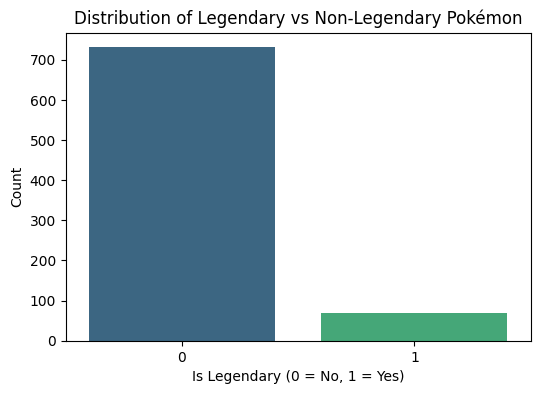

In [13]:
## HISTOGRAM - LEGENDARY/NON-LEGENDARY

plt.figure(figsize=(6,4))
sns.countplot(x="is_legendary", data=df, palette="viridis")

plt.title("Distribution of Legendary vs Non-Legendary Pokémon")
plt.xlabel("Is Legendary (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.show()

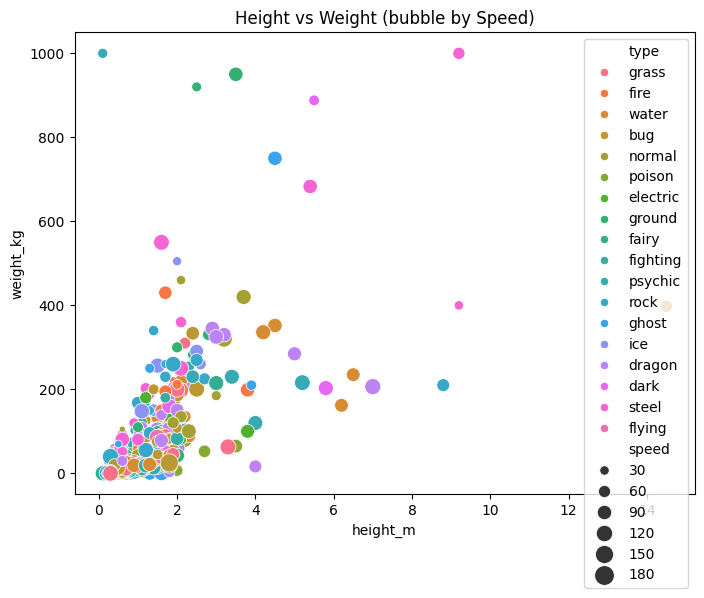

In [14]:
## SCATTER PLOT: Height vs Weight (bubble by Speed)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='height_m', y='weight_kg', hue='type', size='speed', sizes=(20,200))

plt.title('Height vs Weight (bubble by Speed)')

plt.show()

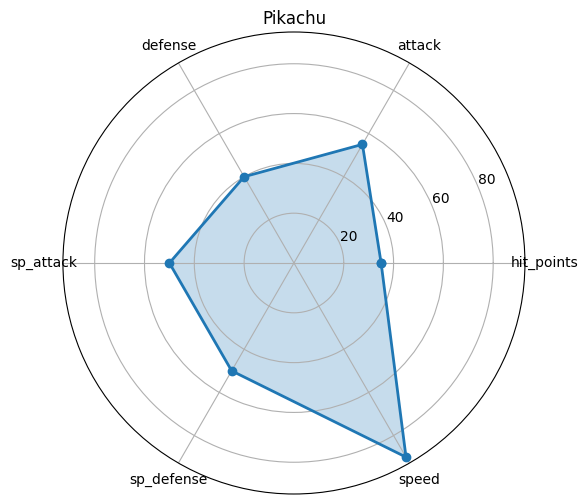

In [15]:
## RADAR CHART

stats_cols = ['hit_points','attack','defense','sp_attack','sp_defense','speed']

def plot_radar(pokemon_row):
    labels = stats_cols
    stats = pokemon_row[stats_cols].values
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats,[stats[0]]))
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    plt.title(pokemon_row['name'])
    plt.show()

plot_radar(df[df['name'] == 'Pikachu'].squeeze()) # I need .squeeze() to turn df into Series

#### MODELLING

In [16]:
X = df[stats_cols]
y = df['is_legendary']

RSEED = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=RSEED)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Save model with pickle
with open('models/random_forest.pkl','wb') as f:
    pickle.dump(model, f)